## **Machine Learning**

**First Project**

OVA & Softmax with LR

*Omer Ayash     208771196*

# Explanation
## import section
train_test_split: Randomly splits the data into two parts:
1) train:to teach the model and
2) test: to check how well it learned

LogisticRegression: simple method for sorting data into categories

accuracy_score, log_loss, f1_score, confusion_matrix: Ways to measure how good our model’s predictions are, from plain percent correct to more nuanced scores


In [139]:
import numpy as np                  # For numerical computations and array handling
import pandas as pd                 # For data manipulation and analysis using DataFrames
import matplotlib.pyplot as plt     # For plotting and visualizing data
import time                         # For measure execution time and introduce delays
import os                           # For interacting with the operating system
import sys                          # For comunication with system to allow clean exit on error

from sklearn.model_selection import train_test_split    # Split dataset into training and test sets
from sklearn.linear_model import LogisticRegression     # Logistic regression model for classification
from sklearn.metrics import (
    accuracy_score,       # Measure the proportion of correct predictions
    log_loss,             # Evaluate performance with logistic loss
    f1_score,             # Compute the harmonic mean of precision and recall
    confusion_matrix      # Generate a confusion matrix to visualize prediction accuracy
)

# Explanation
## Data Preparation and Sanity Checks: Loading, Verification & Preview

**File Check**: Verifies that the required `cifar10_features.npy` and `cifar10_labels.npy` files are present, raising a clear error and exiting if they’re missing.

**Data Load**: Loads the feature matrix and label vector from disk into NumPy arrays.

**Shape & Type Inspection**: Prints out the shapes and data types of these arrays to confirm you have 50,000 samples with 16 features each, and matching label counts.

**Sanity Checks**: Checks for any NaN or infinite values in both features and labels to ensure the data is clean.

**Class Mapping**: Defines a dictionary mapping numeric CIFAR-10 labels (0–9) to their human-readable names.

**Sample Preview**: Iterates over the first ten samples, printing each sample’s rounded feature vector alongside its numeric label and class name for a quick manual inspection.


In [140]:
try:
    required_files = ["cifar10_features.npy", "cifar10_labels.npy"]   # .npy files needed for features and labels
    missing = [f for f in required_files if not os.path.isfile(f)]    # Check each file, collect those that are missing

    if missing:                                                       # If any required files are not found
        raise FileNotFoundError(                                      #   Raise a clear error
            f"Missing required file(s): {missing}. "                  #   Include the list of missing files
            "Ensure you're running this script from the directory "
            "containing the necessary .npy files."
        )
except FileNotFoundError as e:              # Catch the FileNotFoundError
    print(f"Error: {e}")                    # Print the error message to the console
    sys.exit(1)

features = np.load('cifar10_features.npy')   # Load feature matrix , expected shape: (50000, 16)
labels = np.load('cifar10_labels.npy')     # Load label vector from disk  ,expected shape: (50000,)

print("Feature matrix shape:", features.shape)    # Print the shape of X to confirm number of samples and features
print("Label vector shape:", labels.shape ,"\n")      # Print the shape of Y to confirm number of labels
print(f"We want to make sure our data is clean before we train:")
print(f"( NaN - Not a Number , Inf - infinite )\n")
print(f"Any NaN in features? {np.isnan(features).any()}")     # Checks if there are any NaN
print(f"Any Inf in features? {np.isinf(features).any()}")     # Checks if there are any Inf
print(f"Any NaN in labels? {np.isnan(labels).any()}\n")         # Checks if there are any NaN in labels

classes = {
    0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer",
    5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"
}   # Map numeric CIFAR-10 labels to human-readable class names

for i in range(10):
    feat_vec = features[i]                     # raw 16-element feature vector
    label_num = int(labels[i])
    label_name = classes[label_num]

    rounded_features = [float(f"{x:.2f}") for x in feat_vec]
    # format each element to 2 decimal places as string

    print(f"Example {i+1}:")
    print(f"  Label: {label_num} ({label_name})")
    print(f"  Feature vector (16 elements):\n {rounded_features} \n")

Feature matrix shape: (50000, 16)
Label vector shape: (50000,) 

We want to make sure our data is clean before we train:
( NaN - Not a Number , Inf - infinite )

Any NaN in features? False
Any Inf in features? False
Any NaN in labels? False

Example 1:
  Label: 4 (deer)
  Feature vector (16 elements):
 [-10.32, -9.22, 5.68, 10.56, -7.89, -5.44, -13.39, 8.58, 1.24, 2.62, 11.02, -4.23, 5.1, 6.37, -1.81, 7.22] 

Example 2:
  Label: 5 (dog)
  Feature vector (16 elements):
 [7.48, 6.14, 3.34, 0.09, -0.78, -8.86, -6.71, -1.07, 4.99, 1.6, 6.42, -0.74, 2.59, -10.13, 4.18, 0.22] 

Example 3:
  Label: 5 (dog)
  Feature vector (16 elements):
 [11.44, 7.0, 0.53, 4.8, -2.04, -13.86, -5.32, 2.13, 11.25, 6.67, 15.69, -4.42, 3.92, -13.23, 1.96, 1.45] 

Example 4:
  Label: 9 (truck)
  Feature vector (16 elements):
 [-0.2, -1.29, 2.82, 7.99, -5.14, 8.21, 4.82, -2.31, -5.75, -1.8, -14.82, -11.07, 1.99, -3.47, 10.85, -9.4] 

Example 5:
  Label: 6 (frog)
  Feature vector (16 elements):
 [-4.34, -6.52, 6.68

# Explanation
## split train/test section
This section partitions the dataset into training and testing subsets using scikit-learn train_test_split
By specifying test_size=0.3, we reserve 30% of the observations for evaluation, ensuring 70% remain for model fitting. Setting random_state=42 guarantees reproducibility of the split. The addition of stratify=labels maintains the original class distribution across both subsets : an essential step for classification tasks to avoid skewed sampling.
 Finally, we output the size of the resulting splits to confirm the expected dimensions.

In [54]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.3, random_state=42, stratify=labels)
print(f"Training set: {X_train.shape} {y_train.shape}")  # Print shapes of training features and labels using f-string
print(f"Test set:     {X_test.shape} {y_test.shape}")   # Print shapes of test features and labels using f-string

Training set: (35000, 16) (35000,)
Test set:     (15000, 16) (15000,)


# Explanation
## *TestMyModel* function section
This function encapsulates model evaluation by decoupling data I/O from prediction logic.
It ingests file paths to feature and label .npy files, leveraging NumPy’s fast binary loader for minimal overhead.
 After loading X_eval and y_eval, it invokes the model’s predict method to generate class estimates, then computes the official score (typically accuracy) via model.score, ensuring consistency with scikit-learn’s internal evaluation. Returning both the numeric score and the raw prediction array supports downstream analysis, such as error inspection or ensemble integration.

In [58]:
def testmymodel(model, features_path, labels_path):    # Defines a function to evaluate a model on saved files
    Xevaluation = np.load(features_path)                    # Load feature matrix from the specified file
    yevaluation = np.load(labels_path)                   # Load label array from the specified file
    yprediction = model.predict(Xevaluation)                  # Use the model to predict labels for X_eval
    return model.score(Xevaluation, yevaluation), yprediction      # Return the model's accuracy on (X_eval, y_eval) and the predictions


# Explanation
## softmax section
This block fulfilling the softmax classifier via scikit-learn’s LogisticRegression.
We explicitly configure the lbfgs solver and set max_iter=1000 to ensure reliable convergence on complex datasets.
lbfgs is "Limited-memory Broyden–Fletcher–Goldfarb–Shanno" solver
It approximates the second-derivative (Hessian) of the loss function—so it “knows” about curvature—without having to compute or store the full Hessian matrix.
 The training duration is precisely measured using the time module. After fitting on X_train, y_train, we generate predictions on X_test and compute two core performance metrics: accuracy (the proportion of correctly classified samples) and macro-F1 (the harmonic mean of precision and recall averaged equally across classes). Finally, we output the elapsed training time alongside these metrics for immediate diagnostics and comparison against other models.

In [75]:
#Train Softmax calculate runtime, accuracy, F1mean
softmax_model = LogisticRegression(solver='lbfgs', max_iter=1000) # Initialize Softmax (multinomial) logistic regression

start_time_softmax = time.time()           # Record start time for Softmax training to measure training duration
softmax_model.fit(X_train, y_train)    # Fit logistic regression model to the training data
softmax_train_time = time.time() - start_time_softmax         # Compute Softmax training duration

predict_data = softmax_model.predict(X_test)             # Predict class labels for the test set
softmax_acc = accuracy_score(y_test, predict_data)       # Compute accuracy by comparing predictions to labels
softmax_f1_mean = f1_score(y_test, predict_data, average='macro')           # Compute macro-averaged F1 score across all classes
softmax_prob = softmax_model.predict_proba(X_test)
soft_loss = log_loss(y_test, softmax_prob)

print(f"Softmax: time={softmax_train_time:.2f}s, accuracy={softmax_acc:.3f}, F1_mean: {softmax_f1_mean:.3f} , Softmax log-loss   = {soft_loss:.3f} ")  # Print timing and performance metrics


Softmax: time=2.22s, accuracy=0.962, F1_mean: 0.962 , Softmax log-loss   = 0.110 


# Explanation
## softmax testmymodel use

In [150]:
soft_acc, soft_preds = testmymodel(softmax_model, 'X_test.npy', 'y_test.npy')
print(f"Softmax test accuracy: {soft_acc:.6f}")
print(f"Softmax sample preds:  {soft_preds[:10]}")

Softmax test accuracy: 0.962000
Softmax sample preds:  [9 7 2 6 8 1 8 6 1 1]


# Explanation

## Manual One-vs-All (OvA) Classifier Definition, Training & Evaluation

**Class Definition**
   - `__init__(**lr_kwargs)`: stores hyperparameters (e.g. solver, max_iter) for each binary logistic sub-model.
   - `fit(X, y)`:
     - Finds all unique labels in `y`.
     - For each class `c`, creates binary targets (`1` if `y==c`, else `0`), fits a `LogisticRegression(**lr_kwargs)`, and saves it in `self.models[c]`.
   - `predict_proba(X)`: collects each binary model’s probability of the “positive” class and stacks them into an `(n_samples, n_classes)` array.
   - `predict(X)`: picks the class with the highest predicted probability for each sample.
   - `score(X, y)`: computes accuracy by comparing `predict(X)` to the true labels `y`.




In [76]:
class OneVsAllManual:
    def __init__(self, **lr_kwargs):
        self.lr_kwargs = lr_kwargs                          # Keep kwargs to configure each binary classifier

    def fit(self, X, y):                                    # Train one binary classifier per class
        self.classes = np.unique(y)                         # Find all unique class labels in y
        self.models = {}                                    # Prepare dict to hold class → model mapping
        for c in self.classes:                              # For each class c
            y_bin = (y == c).astype(int)                    # Create binary targets: 1 if label==c, else 0
            m = LogisticRegression(**self.lr_kwargs)        # Instantiate LogisticRegression with stored kwargs
            m.fit(X, y_bin)                                 # Fit the binary classifier on X and y_bin
            self.models[c] = m                              # Save the trained model under key c
        return self                                         # Return the fitted OneVsRestManual instance

    def predict_proba(self, X):                             # Predict probability for each class
        probs = [
            self.models[c].predict_proba(X)[:, 1]           # Get P(y=1|x) for class c
            for c in self.classes                           # Loop over each stored class
        ]
        return np.vstack(probs).T                           # Stack and transpose → shape (n_samples, n_classes)

    def predict(self, X):                                   # Predict class labels
        proba = self.predict_proba(X)                       # Compute all class probabilities
        idx = np.argmax(proba, axis=1)                      # Find index of max probability per sample
        return self.classes[idx]                            # Map indices back to class labels

    def score(self, X, y):                                  # Compute accuracy
        y_pred = self.predict(X)                            # Generate predictions
        return accuracy_score(y, y_pred)                    # Return fraction correct

ova_manual = OneVsAllManual(solver='lbfgs', max_iter=1000)  # Create manual OvA with lbfgs solver, 1000 iters
start_ova = time.time()                                     # Record start time for OvA training
ova_manual.fit(X_train, y_train)                            # Train manual OvA on training data
ova_time = time.time() - start_ova                          # Compute elapsed training time
ova_predict = ova_manual.predict(X_test)                    # store predictions once for reuse
ova_acc = accuracy_score(y_test, ova_predict)               # Compute accuracy on test set
ova_f1_mean = f1_score(y_test, ova_predict, average='macro')# Compute macro-averaged F1 score
print(f"Manual OvA: time={ova_time:.2f}s, acc={ova_acc:.4f}, F1={ova_f1_mean:.4f}")  # Print timing and performance


Manual OvA: time=1.05s, acc=0.9601, F1=0.9602


# Explanation
## OvA testmymodel use

In [151]:
ova_acc, ova_preds = testmymodel(ova_manual, 'X_test.npy', 'y_test.npy')
print(f"Manual OvR test accuracy: {ova_acc:.6f}")
print(f"Manual OvR sample preds:  {ova_preds[:10]}")

Manual OvR test accuracy: 0.960133
Manual OvR sample preds:  [9 7 2 6 8 1 8 6 1 1]


# Explanation

## mismatches

here we defines a simple evaluator that runs any trained model on test inputs to get its accuracy and predictions, and a matcher that prints up to ten examples where two models (Softmax vs OvR) disagree, including the true label for each. It then applies these helpers to both classifiers, prints their overall accuracy and a sample of their predictions, and finally lists a handful of cases highlighting where and how their outputs differ from each other and from the ground truth.


In [152]:
# Helper to evaluate a model and return (accuracy, predictions) with the array and not path
def evaluate_model(model, X, y):
    predictions = model.predict(X)                              # Get all predictions at once
    accuracy   = accuracy_score(y, predictions)                       # Compute accuracy
    return accuracy, predictions

def show_mismatches(pred1, pred2, y_true, class_map, max_mismatches=10):

    print("\nMismatches between Softmax and OvR and Y true labels):")
    count = 0
    for idx, (softmax_pred, ova_pred, true_lbl) in enumerate(zip(pred1, pred2, y_true), start=1):
        if softmax_pred != ova_pred:
            print(
                f"Index {idx}: YTrue = {true_lbl} ({class_map[true_lbl]})\t\t|\t"
                f"Softmax={softmax_pred} ({class_map[softmax_pred]})\t\t|\t"
                f"OvR={ova_pred} ({class_map[ova_pred]})"
            )
            count += 1
            if count >= max_mismatches:
                break

#  Softmax testmymodel a
soft_acc, soft_preds = testmymodel(softmax_model, 'X_test.npy', 'y_test.npy')
print(f"Softmax test accuracy: {soft_acc:.6f}")
print(f"Softmax sample preds:  {soft_preds[:10]}")

#  One-vs-All testmymodel
ova_acc, ova_preds = testmymodel(ova_manual, 'X_test.npy', 'y_test.npy')
print(f"Manual OvR test accuracy: {ova_acc:.6f}")
print(f"Manual OvR sample preds:  {ova_preds[:10]}")

#  Show where Softmax vs OvR disagree (and include true label)
show_mismatches(softmax_predictions, ovr_preds, y_test, classes, max_mismatches=10)


Softmax test accuracy: 0.962000
Softmax sample preds:  [9 7 2 6 8 1 8 6 1 1]
Manual OvR test accuracy: 0.960133
Manual OvR sample preds:  [9 7 2 6 8 1 8 6 1 1]

Mismatches between Softmax and OvR and Y true labels):
Index 61: YTrue = 7 (horse)		|	Softmax=5 (dog)		|	OvR=7 (horse)
Index 121: YTrue = 4 (deer)		|	Softmax=3 (cat)		|	OvR=4 (deer)
Index 213: YTrue = 3 (cat)		|	Softmax=4 (deer)		|	OvR=3 (cat)
Index 309: YTrue = 0 (airplane)		|	Softmax=2 (bird)		|	OvR=3 (cat)
Index 703: YTrue = 2 (bird)		|	Softmax=4 (deer)		|	OvR=3 (cat)
Index 764: YTrue = 1 (automobile)		|	Softmax=1 (automobile)		|	OvR=6 (frog)
Index 1307: YTrue = 3 (cat)		|	Softmax=5 (dog)		|	OvR=3 (cat)
Index 1394: YTrue = 7 (horse)		|	Softmax=7 (horse)		|	OvR=5 (dog)
Index 1427: YTrue = 0 (airplane)		|	Softmax=0 (airplane)		|	OvR=4 (deer)
Index 1450: YTrue = 7 (horse)		|	Softmax=7 (horse)		|	OvR=4 (deer)


# Explanation

## OvA vs Softmax matrix

here I constructs a  matrix counting how often the Softmax and OvR models jointly predict each pair of classes, I also masked out the diagonal so correct predictions remain uncolored and only mismatches show up in a vivid red heatmap.
 It annotates every cell with its mismatch count.
 This routine visualizes the joint distribution of predicted labels from two classifiers:
  Softmax and a manual One-vs-Rest via a heatmap. By computing pairs [s, o], we tally how often Softmax predicts class s while OvR predicts class o. We dynamically infer n_classes to generalize across any label set size. Utilizing red colormap for visualization.
   The resulting visualization serves as a diagnostic tool to identify systematic disagreements or confusions between models.


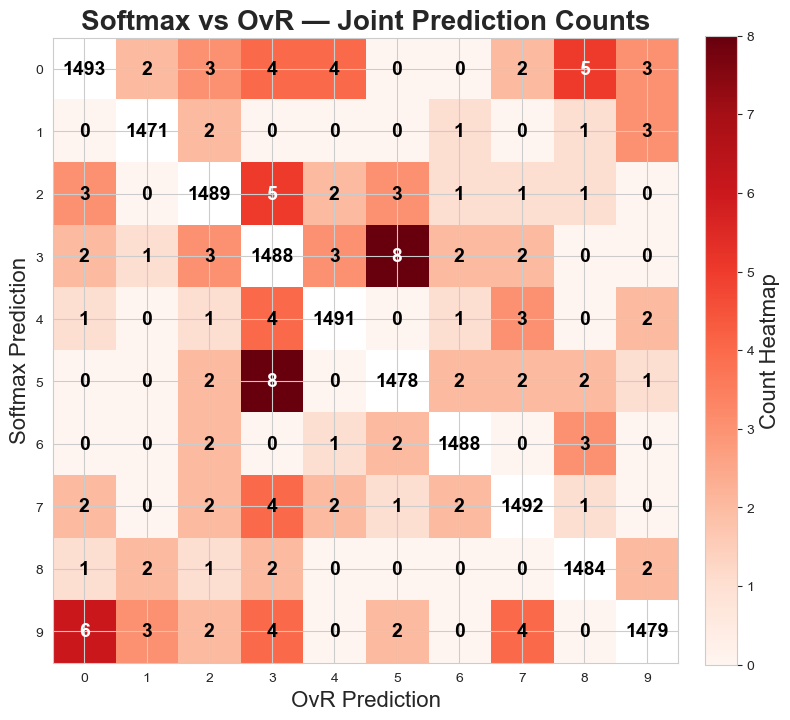

In [153]:
#  Build the matrix
n = len(classes)                                             # Determine number of classes dynamically
confusion_matrix_pair = np.zeros((n, n), dtype=int)          # Initialize confusion matrix with zeros
for s, o in zip(softmax_predictions, ovr_preds):                         # Iterate over paired predictions
    confusion_matrix_pair[s, o] += 1       # Increment count: s for Softmax prediction Vs o for OvR prediction

#  Mask out only the diagonal for coloring
diag_mask = np.eye(n, dtype=bool)
masked_confusion_matrix = np.ma.masked_array(confusion_matrix_pair, mask=diag_mask)

#  Plot the heatmap—diagonal cells stay background‐white
fig, ax = plt.subplots(figsize=(8, 8))                      # Create figure and axes using subplots for clarity
im = ax.imshow(masked_confusion_matrix, cmap='Reds', interpolation='nearest') # Display heatmap with RED colormap

#  Annotate every cell with its count
for i in range(n):
    for j in range(n):
        ax.text(
            j, i,
            confusion_matrix_pair[i, j],
            ha='center', va='center',                   # Center text in each cell
            color = 'black' if diag_mask[i, j] else     # Diagonal in a darker color
                    ('white' if confusion_matrix_pair[i, j] > 4 else 'black'),# Choose text color for readability
            fontsize=14, fontweight='bold'
        )

#  Ticks and labels
ticks = np.arange(n)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticks)
ax.set_yticklabels(ticks)
ax.set_xlabel('OvR Prediction',fontsize=16)                             # Label x-axis
ax.set_ylabel('Softmax Prediction',fontsize=16)                         # Label y-axis
ax.set_title('Softmax vs OvR — Joint Prediction Counts',fontsize=20,fontweight='bold')    # Set plot title

#  Colorbar
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Count Heatmap',fontsize=16) # Add colorbar with label

plt.tight_layout()              # Adjust layout to prevent clipping
plt.show()


# Explanation

## cross entropy

This section measures model calibration using cross-entropy (log-loss).
For the built-in multinomial (“softmax”) classifier, we directly pass the true labels and its predict_proba outputs into sklearn.metrics.log_loss.
For the manual One-vs-All ensemble, we first normalize each sample’s binary submodel probabilities by dividing each row by its sum—thereby constructing a valid multiclass probability vector—before computing log-loss.
 This procedure penalizes overconfident misclassifications and provides a robust assessment of predictive uncertainty, which is critical when downstream decisions rely on well-calibrated probability estimates.


In [154]:
# Softmax log-loss
softmax_log_loss = log_loss(y_test, softmax_model.predict_proba(X_test))  # Compute cross-entropy loss using true labels and softmax probabilities

# Manual OvR log-loss: first normalize the predicted probabilities
ova_probability = ova_manual.predict_proba(X_test)                         # cache OvR probabilities to avoid double calls
row_sums = ova_probability.sum(axis=1, keepdims=True)                       # Sum per sample (should be >0)
ova_proba_norm = np.divide(
    ova_probability,
    row_sums,
    out=np.zeros_like(ova_probability),                                     # Safe divide: zeros where row_sums == 0
    where=row_sums != 0
)
# Clip to avoid log(0) or log(1) extremes
ova_proba_norm=np.clip(ova_proba_norm, 1e-15, 1 - 1e-15)
ova_log_loss = log_loss(y_test, ova_proba_norm)                           # Compute cross-entropy loss using normalized OvR probabilities

print(f"Softmax log-loss       = {softmax_log_loss:.4f}")               # Display softmax model's log-loss to 4 decimal places
print(f"Manual OvA log-loss    = {ova_log_loss:.4f}")                  # Display manual OvR model's log-loss to 4 decimal places


Softmax log-loss       = 0.1099
Manual OvA log-loss    = 0.1352


# Explanation

## f1 mean score

This snippet assesses class‐balanced performance by computing the macro‐averaged F1 score for both the softmax (multinomial logistic) model and the manual One-vs-All ensemble. By calling f1_score(y_test, model.predict(X_test), average='macro'), we obtain a single metric that equally weights each class’s precision-recall trade-off, making it ideal for multiclass problems with potential class imbalance. Finally, both F1 values are printed with four‐decimal precision to enable direct, concise comparison of how well each model balances false positives and false negatives across all categories.

In [130]:
softmax_f1_score = f1_score(y_test, softmax_model.predict(X_test), average='macro')  # Softmax macro-F1
ova_f1_mean  = f1_score(y_test, ova_manual.predict(X_test), average='macro')      # OvR macro-F1

print(f"Softmax Macro-F1 = {softmax_f1_score:.4f}")      # Report Softmax macro-F1
print(f"OvA     Macro-F1 = {ova_f1_mean:.4f}")       # Report OvR macro-F1


Softmax Macro-F1 = 0.9620
OvR     Macro-F1 = 0.9602


# Explanation

## One-vs-All confusion matrix

This block visualizes the One-vs-All confusion matrix while de-emphasizing correct predictions by masking its diagonal. First, it computes the $n\times n$ confusion matrix between true labels (`y_test`) and OvA predictions (`ova_predict`). It then builds a boolean mask (`diag_mask`) that marks the diagonal entries and applies it to create a masked array (`masked_cm`), so that `imshow` draws only the off-diagonal (“misclassification”) cells in a red color map, leaving correct entries in the background color. After setting the figure title, colorbar, and axis labels, it loops over every cell—both masked and unmasked—to overlay the raw count text, using black for diagonal counts and contrasting white/black for off-diagonal counts. Finally, `tight_layout()` ensures no labels are cut off, and `plt.show()` renders the complete plot.


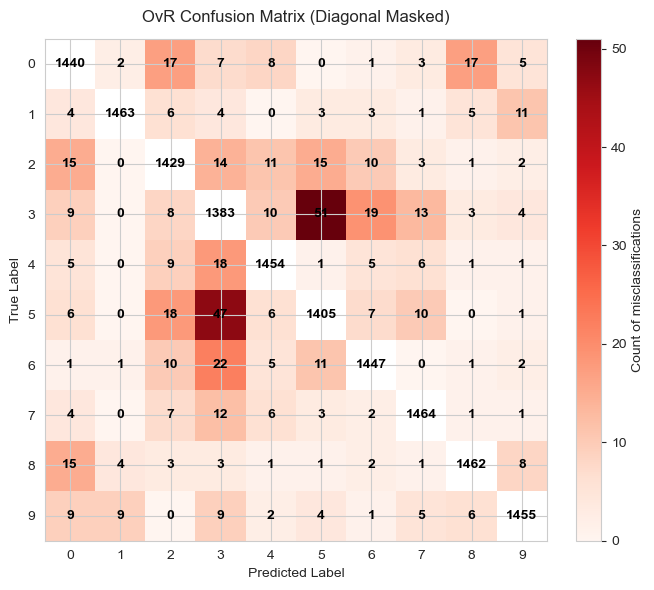

In [158]:
# Confusion matrix for OvA with diagonal masked out of the color map
fig, ax = plt.subplots(figsize=(8, 6))                                   # Create figure and axis
cm = confusion_matrix(y_test, ova_predict)                 # Compute confusion matrix

# Mask the diagonal so correct predictions remain background-white
n = cm.shape[0]
diag_mask = np.eye(n, dtype=bool)
masked_cm = np.ma.masked_array(cm, mask=diag_mask)

# Display heatmap of only the off-diagonal counts
im = ax.imshow(masked_cm, cmap='Reds', interpolation='nearest')

# Title, colorbar, and labels
ax.set_title("OvR Confusion Matrix (Diagonal Masked)", pad=12)
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Count of misclassifications")

ticks = np.arange(n)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticks)                                                # Or use class names
ax.set_yticklabels(ticks)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

# Annotate every cell (including diagonal) with its count
thresh = cm.max() / 2
for i in range(n):
    for j in range(n):
        ax.text(
            j, i, cm[i, j],
            ha='center', va='center',
            color='black' if diag_mask[i, j]                            # Diagonal text in black
                  else ('white' if cm[i, j] > thresh else 'black'),     # Off-diagonal text contrasting
            fontweight='bold'
        )

plt.tight_layout()
plt.show()


# Explanation

## most confused pair adjusment

This code first isolates the pair of classes that the OvA model confuses most often by copying the full confusion matrix, zeroing out its diagonal (so only misclassifications remain), and finding the off-diagonal cell with the highest count. It then creates boolean masks to extract just the samples belonging to those two classes from both the training and test sets, trains a new binary logistic regression on that reduced dataset—measuring how long the fit takes—and finally evaluates this binary classifier’s accuracy and F1 score (with one of the two classes designated as “positive”). The printed results show whether focusing on those two particularly ambiguous classes with a dedicated model improves discrimination.


In [132]:
# Find the most confused pair of classes (i, j)
cm_off_diag = cm.copy()                                                              # Copy confusion matrix to preserve original
np.fill_diagonal(cm_off_diag, 0)                                                     # Zero out correct predictions to focus on errors
most_i, most_j = np.unravel_index(cm_off_diag.argmax(), cm_off_diag.shape)           # Get row, col of maximum off-diagonal value
print(f"Most confused classes: {most_i} ({classes[most_i]}) vs {most_j} ({classes[most_j]})")  # Report the two most-confused classes

# Filter training and test sets for only those two classes
train_mask_binary = np.isin(y_train, [most_i, most_j])                               # Create mask for train samples of classes i or j
test_mask_binary  = np.isin(y_test,  [most_i, most_j])                               # Create mask for test samples of classes i or j

X_train_binary = X_train[train_mask_binary]                                          # Subset training features
y_train_binary = y_train[train_mask_binary]                                          # Subset training labels
X_test_binary  = X_test[test_mask_binary]                                            # Subset test features
y_test_binary  = y_test[test_mask_binary]                                            # Subset test labels

# Train and time a binary LogisticRegression on classes i vs j
binary_clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)      # Instantiate binary classifier with fixed seed
t0_binary = time.time()                                                              # Record start time
binary_clf.fit(X_train_binary, y_train_binary)                                       # Train on just the two classes
binary_train_time = time.time() - t0_binary                                          # Compute elapsed training time

# Evaluate the binary classifier
binary_preds     = binary_clf.predict(X_test_binary)                                 # Predict on the binary test subset
binary_accuracy  = accuracy_score(y_test_binary, binary_preds)                       # Compute binary accuracy
binary_f1        = f1_score(y_test_binary, binary_preds,                             # Compute binary F1 for class i
                             average='binary', pos_label=most_i)

print(
    f"Binary {most_i} vs {most_j}: "
    f"time={binary_train_time:.2f}s, accuracy={binary_accuracy:.4f}, F1={binary_f1:.4f}"
)                                                                                     # Display training time and metrics


Most confused classes: 3 (cat) vs 5 (dog)
Binary 3 vs 5: time=0.03s, accuracy=0.9613, F1=0.9614


# Explanation

## most confused pair adjusment

This code implements a quick “two-stage” correction on the Softmax model’s predictions specifically for classes 3 and 5. First, it records the current time so we can measure how long the entire refinement takes. It then generates the base Softmax predictions on the test set and makes a copy of them. Using `np.isin`, it builds a Boolean mask identifying exactly those samples where the Softmax model predicted class 3 or 5—presumably a known confusion pair. For those masked cases, it calls a specialized binary classifier (`binary_clf`) trained only to distinguish between class 3 and class 5, and overwrites the Softmax predictions with the binary model’s output. Finally, it computes accuracy and macro-averaged F1 on these refined predictions, measures the elapsed time since the start, and prints a concise summary of the refinement’s runtime and performance gains.


In [159]:
start_time = time.time()                                            # Record the current time to measure refinement duration
base_preds = softmax_model.predict(X_test)                            # Stage 1: get initial Softmax predictions on the test set
refined_preds = base_preds.copy()                                   # Stage 2: make a copy to hold any refined values
mask_3_5 = np.isin(base_preds, [3, 5])                              # Identify indices where Softmax predicted class 3 or 5
bin_preds = binary_clf.predict(X_test[mask_3_5])                       #   Predict those tricky cases with the binary 3-vs-5 classifier
refined_preds[mask_3_5] = bin_preds                                 #   Overwrite Softmax’s 3/5 predictions with the binary model’s output

softmax_accuracy = accuracy_score(y_test, refined_preds)                    # Compute accuracy of the refined predictions
soft_f1  = f1_score(y_test, refined_preds, average='macro')         # Compute macro-averaged F1 score of the refined predictions
time_refined = time.time() - start_time                             # Calculate how long the entire refinement took

print(                                                              # Display timing and performance in one line
    f"Softmax + 3vs5 – Time: {time_refined:.2f}s, "
    f"Accuracy: {softmax_accuracy:.4f}, Macro-F1: {soft_f1:.4f}"
)


Softmax + 3vs5 – Time: 0.02s, Accuracy: 0.9621, Macro-F1: 0.9622


In [138]:
start_time = time.time()                                              # Record the current time to measure refinement duration
ova_pred_refined = ova_preds.copy()                              # Stage 1: copy base OvR predictions to avoid mutating the original
mask_3_5 = np.isin(ova_pred_refined, [3, 5])                           # Stage 2: create mask for samples predicted as class 3 or 5
ova_pred_refined[mask_3_5] = binary_clf.predict(X_test[mask_3_5])         #   Use the binary 3-vs-5 classifier to re-predict those samples

ova_refined_acc = accuracy_score(y_test, ova_pred_refined)             # Compute accuracy on the refined predictions
ova_refined_f1  = f1_score(y_test, ova_pred_refined, average='macro')  # Compute macro-averaged F1 score on the refined predictions
ova_refine_time = time.time() - start_time                             # Calculate elapsed time for the entire refinement process

print(                                                                # Print a concise summary line
    f"Hierarchical OvA + 3vs5 – Time: {ova_refine_time:.2f}s, "
    f"Accuracy: {ova_refined_acc:.4f}, Macro-F1: {ova_refined_f1:.4f}"
)


Hierarchical OvR + 3vs5 – Time: 0.01s, Accuracy: 0.9604, Macro-F1: 0.9604


In [ ]:
# Build a summary table with all models
summary_all = pd.DataFrame({                           # Create DataFrame summarizing each model’s metrics
    'Model': [                                        # List model identifiers
        'Softmax',                                   #   Base softmax classifier
        'Manual OvA',                                #   Base one-vs-all classifier
        f'Binary {idx_true} vs {idx_pred}',           #   Binary classifier on the hardest pair
        'Softmax + 3vs5',                            #   Softmax with 3-vs-5 refinement
        'OvA + 3vs5'                                 #   OvA with 3-vs-5 refinement
    ],
    'Train Time (s)': [                               # Training durations in seconds
        softmax_train_time,                          #   Base softmax training time
        ova_time,                              #   Base OvR training time
        binary_train_time,                           #   Binary 3-vs-5 training time
        soft_refine_time,                            #   Softmax+3vs5 end-to-end time
        ovr_refine_time                              #   OvR+3vs5 end-to-end time
    ],
    'Accuracy': [                                     # Test-set accuracy scores
        softmax_acc,                                 #   Base softmax accuracy
        ovr_acc_base,                                #   Base OvR accuracy
        binary_acc,                                  #   Binary classifier accuracy
        soft_acc_refined,                            #   Softmax+3vs5 accuracy
        ovr_acc_refined                              #   OvR+3vs5 accuracy
    ],
    'Log Loss': [                                     # Cross-entropy (log) loss; NaN where not applicable
        softmax_loss,                                #   Base softmax log-loss
        ovr_loss,                                    #   Base OvR log-loss
        np.nan,                                      #   No log-loss for binary
        np.nan,                                      #   No log-loss for refined softmax
        np.nan                                       #   No log-loss for refined OvR
    ],
    'Macro F1': [                                     # Macro-averaged F1 scores
        softmax_f1,                                  #   Base softmax macro-F1
        ovr_f1_base,                                 #   Base OvR macro-F1
        binary_f1,                                   #   Binary classifier F1
        soft_f1_refined,                             #   Softmax+3vs5 macro-F1
        ovr_f1_refined                               #   OvR+3vs5 macro-F1
    ]
})

summary_all                                          # Display the consolidated results table
